# GRIP : THE SPARKS FOUNDATION

# DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP

# TASK#2 : Prediction using Unspervised ML

# AUTHOR : AYUSHI PADAMWAR

# BATCH : Feb,2022

### Objective: 
 To predict the optimum number of clusters using k-means method and representing it visually using "The Elbow Method".
 

###### Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns

###### Loading the dataset and reading it

In [3]:
iris = pd.read_csv("Iris.csv")
print("Data is Succesfully imported")
iris_df = pd.DataFrame(iris)
iris_df.info() # gives over view of dataset
iris_df.head() # gives the tabulated form of 1st 5 rows

Data is Succesfully imported
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Finding the optimum number of clusters for K Means and determining the value of K

In [5]:
# Finding the optimum number of clusters for k-means classification
x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\Ayushi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


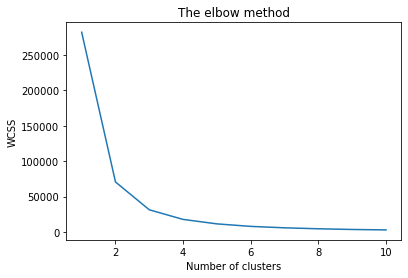

In [6]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

##### 
The location of a bend in the plot is generally considered as an indicator of the appropriate number of clusters.

Here K= 3 or 4 is a good solution.
The method is termed as Elbow Method.

### Conclusion : Here optimum number of Clusters is 3

###### Applying kmeans to the dataset / Creating the kmeans classifier

In [7]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


###### Visualising the clusters 

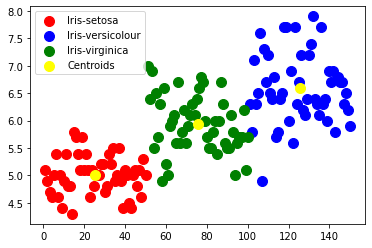

In [8]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

###### Labeling the predictions & Adding prediction to the dataset

In [9]:
#considering 0 Corresponds to 'Iris-setosa'
#1 to 'Iris-versicolour'
#2 to 'Iris-virginica'
y_kmeans = np.where(y_kmeans==0, 'Iris-setosa', y_kmeans)
y_kmeans = np.where(y_kmeans=='1', 'Iris-versicolour', y_kmeans)
y_kmeans = np.where(y_kmeans=='2', 'Iris-virginica', y_kmeans)

data_with_clusters = iris_df.copy()
data_with_clusters["Cluster"] = y_kmeans
print(data_with_clusters.head(5))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1            5.1           3.5            1.4           0.2  Iris-setosa   
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

       Cluster  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa  


##### PairPlot

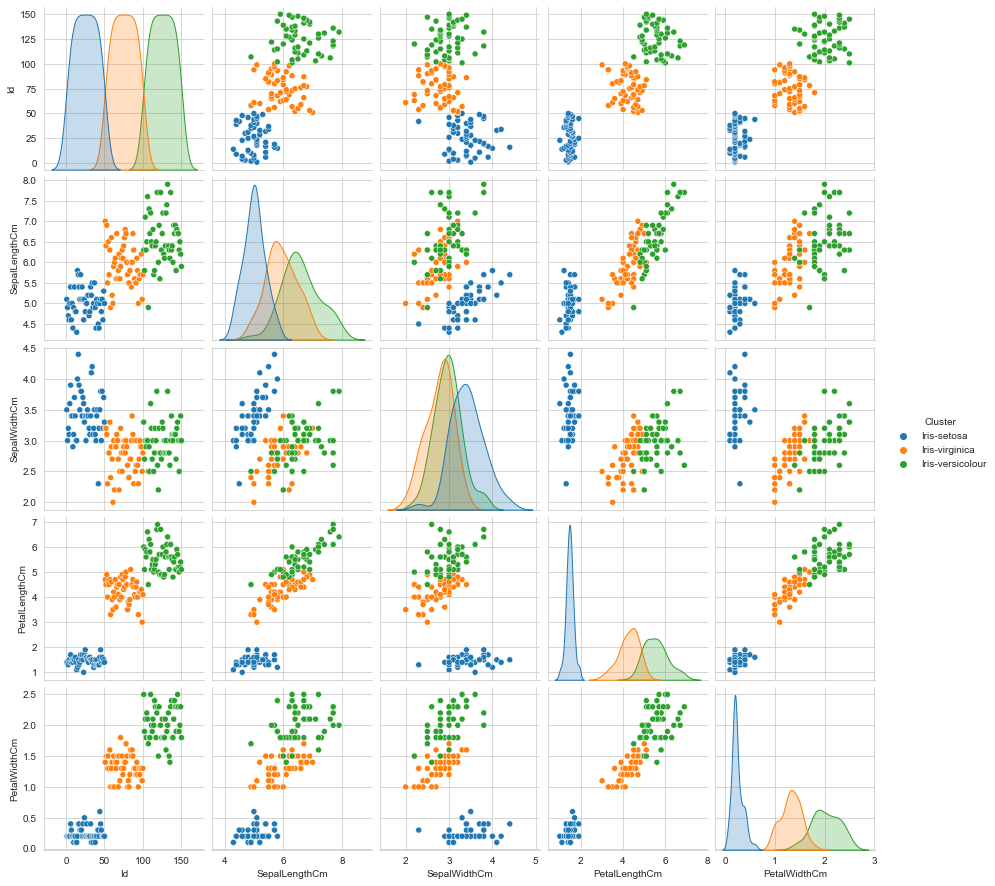

In [18]:
### hue = species colours plot as per species
### It will give 3 colours in the plot

sns.set_style('whitegrid')   ### Sets grid style
sns.pairplot(data_with_clusters,hue = 'Cluster')

1.Petal-length and petal-width seem to be positively correlated(seem to be having a linear relationship)

2.Iris-Setosa seems to have smaller petal length and petal width as compared to others.

3.Looking at the overall scenario, it seems to be the case that Iris-Setosa has smaller dimensions than other flowers.

#### Thank You